## Load and Process Image

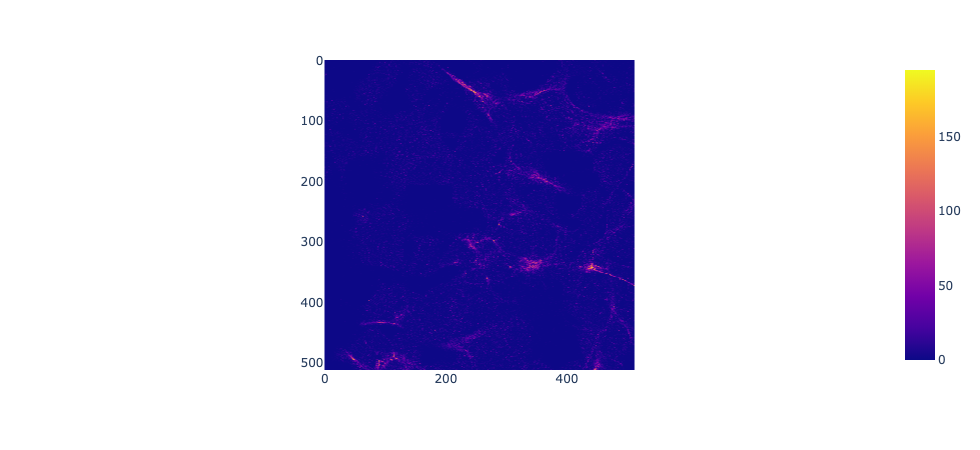

In [12]:
import cv2
import numpy as np
import plotly.express as px
import csv

#proteins that exist in our sample
proteins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26]

#files dictionary
datafiles = {}
for i in proteins:
    datafiles[i] = []

with open("Data_in_use.csv", 'r') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        if row[0] != "Id":
            datafiles[int(row[1])].append(row[0])    

#number of samples per protein
number_of_samples = len(datafiles[0])
            
# Read RGB image 
img = cv2.imread("data/" + datafiles[11][0] + "_green.png")  
  
# Output img with window name as 'img' 
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# blur the image to reduce noise
# figure_size = 3 # the dimension of the x and y axis of the kernal.
# img = cv2.blur(img,(figure_size, figure_size))
px.imshow(img)

In [7]:
shape = img.shape
images = np.zeros((len(proteins), number_of_samples, *shape))
print(images.shape)

(24, 1, 512, 512)


## Convert image to binary

/opt/anaconda3/lib/python3.7/site-packages/gtda/images/preprocessing.py:68: RuntimeWarning:

invalid value encountered in true_divide

/opt/anaconda3/lib/python3.7/site-packages/gtda/images/preprocessing.py:68: RuntimeWarning:

invalid value encountered in greater



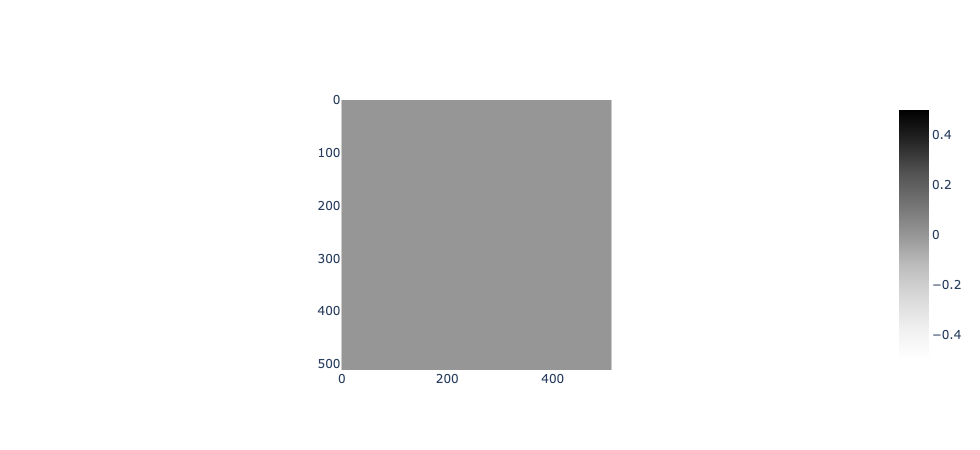

In [17]:
from gtda.images import HeightFiltration, RadialFiltration, \
    DilationFiltration, ErosionFiltration, SignedDistanceFiltration, \
    Binarizer

bz = Binarizer(threshold=10/255)
binned = bz.fit_transform_plot(images[0])

In [16]:
from gtda.pipeline import make_pipeline
from gtda.diagrams import BettiCurve
from gtda.homology import CubicalPersistence
from gtda.diagrams import PersistenceEntropy
import pandas as pd

p = make_pipeline(HeightFiltration(direction=np.array([1,1])), CubicalPersistence(), BettiCurve())
p.fit_transform(binned)

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]])

## Pipline above  broken down into individual steps

In [5]:
hf = HeightFiltration(direction=np.array([1,1]))
hf_images = hf.fit_transform(binned)
px.imshow(hf_images[0])

IndexError: index 2 is out of bounds for axis 0 with size 2

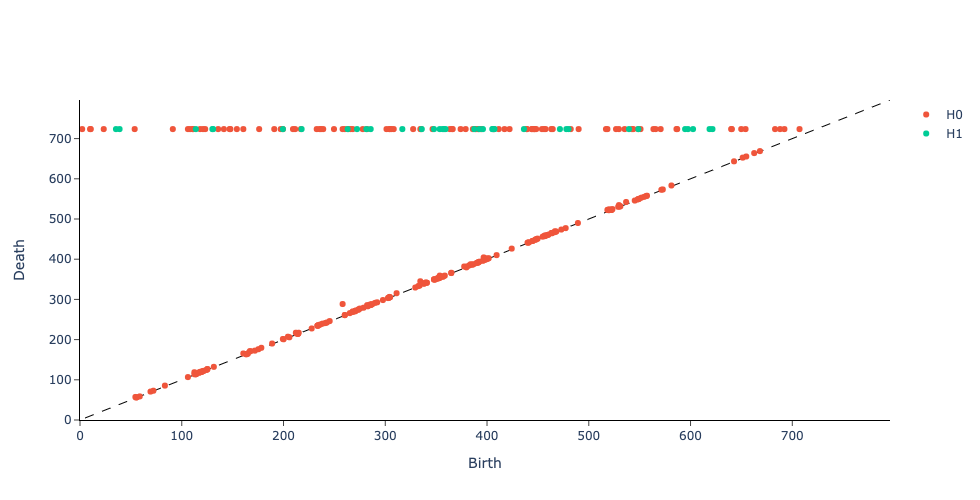

In [17]:
cp = CubicalPersistence()
barcodes = cp.fit_transform_plot(hf_images)

In [20]:
pe = PersistenceEntropy()
pe.fit_transform(barcodes)
print(pe.fit_transform(barcodes))

[[4.53439997 3.45278437]]


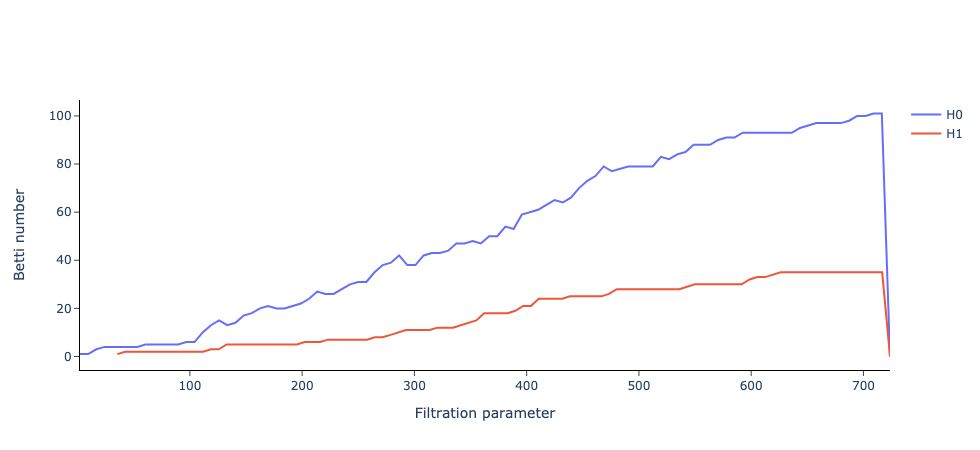

array([[[  1,   1,   3,   4,   4,   4,   4,   4,   5,   5,   5,   5,
           5,   6,   6,  10,  13,  15,  13,  14,  17,  18,  20,  21,
          20,  20,  21,  22,  24,  27,  26,  26,  28,  30,  31,  31,
          35,  38,  39,  42,  38,  38,  42,  43,  43,  44,  47,  47,
          48,  47,  50,  50,  54,  53,  59,  60,  61,  63,  65,  64,
          66,  70,  73,  75,  79,  77,  78,  79,  79,  79,  79,  83,
          82,  84,  85,  88,  88,  88,  90,  91,  91,  93,  93,  93,
          93,  93,  93,  93,  95,  96,  97,  97,  97,  97,  98, 100,
         100, 101, 101,   0],
        [  1,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
           3,   3,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,
           6,   6,   6,   7,   7,   7,   7,   7,   7,   8,   8,   9,
          10,  11,  11,  11,  11,  12,  12,  12,  13,  14,  15,  18,
          18,  18,  18,  19,  21,  21,  24,  24,  24,  24,  25,  25,
          25,  25,  25,  26,  28,  28,  28,  28,  28,  28,  28,  28,
    

In [21]:
from gtda.diagrams import BettiCurve
bc = BettiCurve()
bc.fit_transform_plot(barcodes)